- 아래의 미션을 Jupyter Notebook으로 풀이 후, [File] - [Download as]에 [HTML (.html] 로 저장하여 메일로 송부해주세요.
- 제출 양식 : [하나은행_데이터] 홍길동_개별 미션 (2주차 3일)
- 제출 기한 : 1월 24일 23시 59분까지
- 풀이는 다음날 오전에 같이 진행 될 예정입니다.

- 소매점 판매 데이터의 고객에 대한 분석을 수행하고자 한다.
    1. 앞서 병합한 df2 데이터를 이용해, '총구매금액'이 높은 상위 100명의 고객 명단을 추출하여, result_member_vip.xlsx로 저장 하시오.
    2. 회원 '성별'에 따른 '총구매금액'의 합을 비교하고자 한다. '성별' 별 '총구매금액'의 합을 Table로 계산하시오.
    3. '결혼유무'에서 '기혼'에 해당하는 고객들 중 '총방문횟수'가 높은 상위 30명의 고객명단을 확인 하시오.
    4. '연령'을 이용해, 고객 '연령대'를 계산하고, '총구매금액'의 합이 가장 높은 2개의 '연령대'를 확인하여, 두 연령대 간의 '총구매금액'의 평균의 차이를 계산 하시오.
    5. '회원상태'에 따른 '총구매금액'의 평균을 시각화 하시오.
    6. '총구매금액'을 '총방문횟수'로 나누어, '1회방문구매평균'을 계산하고, 생성된 파생변수를 바탕으로 아래와 같이 고객등급을 분류하시오.
        - '1회방문구매평균'이 10만원 이상 고객은 A / 5만원 이상은 B / 2만원 이상 C / 나머지는 D 등급으로 분류
        - 분류된 고객 등급은 '고객등급'이라는 새로운 파생변수로 생성
    7. 새로 생성된 파생변수 '고객등급'에서 '기혼자가 가장 많은 그룹은 어디 그룹인지 확인하시오.
    8. df2 데이터에서 '주소'데이터를 바탕으로, "시" 별 '지역(시)'이라는 이름의 새로운 파생변수를 생성 하시오.
        - 서울시 / 용인시 / 성남시 /수원시 /광주시 / 나머지 지역은 기타로 분류
    9. '고객등급'을 입력했을 때, 해당 고객등급에서 '성별'에 따른 '총구매금액' 기술통계량을 계산하여 'result9_등급명.xlsx'저장하는 프로그램을 구성 하시오.

In [1]:
import pandas as pd
import numpy as np

In [7]:
# 데이터 병합
df_member = pd.read_csv("실습 파일/03_store_member.csv")
df_product = pd.read_csv("실습 파일/03_store_product.csv")

p1 = df_product.pivot_table(index="회원번호", values=['구매금액', '구매수량'], aggfunc = 'sum').reset_index()
p1['회원번호'] = p1['회원번호'].astype('int')
p1 = p1.rename(columns={'구매금액':'총구매금액','구매수량':'총구매수량'})

m1 = df_member.merge(p1, left_on = "회원번호", right_on = "회원번호")

df_product['Label']=1
p2 = df_product.pivot_table(index=['회원번호', '공급일자'],
                           values='Label', aggfunc='min').reset_index()
p2 = p2.pivot_table(index='회원번호', values='Label', aggfunc='sum').reset_index()
p2 = p2.rename(columns={'Label':'총방문횟수'})

In [8]:
df2 = m1.merge(p2, on ='회원번호', how='inner')
df2.head(2)

,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,51,1991230,382.0,86
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,71,2095860,472.5,79


In [5]:
df2=pd.read_csv("실습 파일/03_Merge_Data.csv")
del df2['Unnamed: 0']
df2

,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,51,1991230,382.0,86
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,71,2095860,472.5,79
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,46,8273550,1675.4,126
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,49,6289495,1401.8,125
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,70,3067930,602.0,57
...,...,...,...,...,...,...,...,...,...
4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,55,51550,10.0,1
4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,36,22500,3.0,1
4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,43,18500,3.0,1
4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,57,5300,1.0,1


In [6]:
# 1. 앞서 병합한 df2 데이터를 이용해, '총구매금액'이 높은 상위 100명의 고객 명단을 추출하여, result_member_vip.xlsx로 저장 하시오.
result_m_vip = df2.sort_values('총구매금액', ascending=False).head(100)
result_m_vip

,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수
133,2249,정상회원,여,NaN,경기 용인시 수지구 풍덕천2,47,22346350,4373.60,174
156,2277,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,47,21950630,4425.70,170
2857,5068,탈퇴,여,기혼,경기 용인시 수지구 동천동,47,21285710,4180.50,170
3645,5856,탈퇴,여,기혼,경기 용인시 수지구 신봉동,46,21217470,4006.96,172
327,2472,정상회원,여,미혼,경기 용인시 수지구 풍덕천2,44,20191005,4044.20,167
...,...,...,...,...,...,...,...,...,...
38,2140,정상회원,여,기혼,경기 용인시 수지구 풍덕천1,53,7708970,1157.20,113
375,2524,정상회원,여,미혼,경기 용인시 수지구 풍덕천1,46,7703060,1745.50,147
311,2453,정상회원,여,미혼,경기 용인시 수지구 상현2동,41,7663730,1566.50,146
3866,6078,탈퇴,여,기혼,경기 용인시 수지구 신봉동,39,7644660,1651.84,132


In [7]:
result_m_vip.to_excel("생성 파일/result_member_vip.xlsx", index=False)

In [8]:
#2. 회원 '성별'에 따른 '총구매금액'의 합을 비교하고자 한다. '성별' 별 '총구매금액'의 합을 Table로 계산하시오.
df2.pivot_table(index='성별', values='총구매금액', aggfunc='sum')

,총구매금액
성별,
남,250926387
여,3925957601


In [22]:
#3. '결혼유무'에서 '기혼'에 해당하는 고객들 중 '총방문횟수'가 높은 상위 30명의 고객명단을 확인 하시오.
df2[df2['결혼유무']=='기혼'].sort_values('총방문횟수', ascending=False).head(30)

,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수
39,2141,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,50,15302800,2896.70,173
3645,5856,탈퇴,여,기혼,경기 용인시 수지구 신봉동,46,21217470,4006.96,172
2441,4649,탈퇴,여,기혼,경기 용인시 수지구 풍덕천2,46,16471290,3447.20,171
2857,5068,탈퇴,여,기혼,경기 용인시 수지구 동천동,47,21285710,4180.50,170
1928,4135,탈퇴,여,기혼,경기 용인시 수지구 신봉동,49,18381620,3219.43,170
156,2277,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,47,21950630,4425.70,170
142,2260,정상회원,여,기혼,경기 용인시 수지구 풍덕천동,41,18681595,3870.15,169
166,2288,정상회원,여,기혼,경기 용인시 수지구 풍덕천동,50,17170370,2921.50,166
103,2214,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,42,14895300,2986.40,162
372,2521,정상회원,여,기혼,경기 용인시 수지구 신봉동,44,13609730,2985.55,161


In [17]:
#4. '연령'을 이용해, 고객 '연령대'를 계산하고, '총구매금액'의 합이 가장 높은 2개의 '연령대'를 확인하여, 두 연령대 간의 '총구매금액'의 평균의 차이를 계산 하시오.
def age(age):
    if pd.isnull(age):
        return "확인 불가"
    
    if age>=80:
        return "80대 이상"
    elif age>=70:
        return "70대"
    elif age>=60:
        return "60대"
    elif age>=50:
        return "50대"
    elif age>=40:
        return "40대"
    elif age>=30:
        return "30대"
    elif age>=20:
        return "20대"
    elif age<20:
        return "미성년자"
    
    
def func(x):
    if x>=100:
        return "100대"
    return str(x)[0]+"0대"

df2['연령대2']=df2['연령'].apply(func)
df2['연령대2'].value_counts()

연령대2
40대     1326
50대      919
30대      882
60대      676
70대      368
80대       74
20대       34
90대        4
100대       2
Name: count, dtype: int64

In [13]:
df2.pivot_table(index='연령대', values="총구매금액", aggfunc="sum").sort_values("총구매금액")

,총구매금액
연령대,
20대,12211140
80대 이상,46990815
70대,288334535
60대,563007566
30대,602754877
50대,984225059
40대,1679359996


In [14]:
idx = df2['연령대'].value_counts().head(2).index
age1 = df2[df2['연령대']==idx[0]][['총구매금액']].mean()[0]
age2 = df2[df2['연령대']==idx[1]][['총구매금액']].mean()[0]
abs(age1-age2)

195511.71931750863

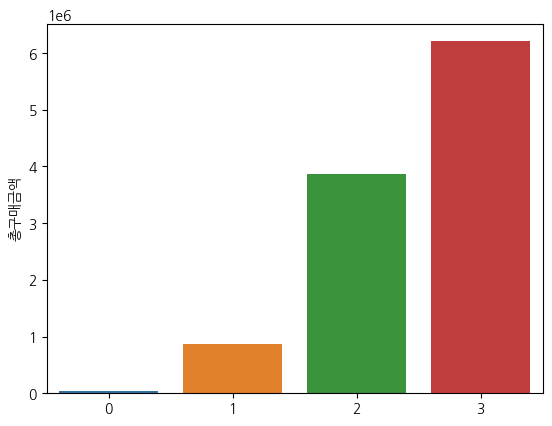

In [19]:
# 5. '회원상태'에 따른 '총구매금액'의 평균을 시각화 하시오.
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sample = df2.pivot_table(index='회원상태', values="총구매금액").reset_index()

# fig = plt.figure() #흰색 도화지
# plt.bar(sample.회원상태, sample.총구매금액)

sns.barplot(data=sample, x= sample.index, y='총구매금액',)
plt.show()

In [71]:
#6. '총구매금액'을 '총방문횟수'로 나누어, '1회방문구매평균'을 계산하고, 
#    생성된 파생변수를 바탕으로 아래와 같이 고객등급을 분류하시오.
#- '1회방문구매평균'이 10만원 이상 고객은 A / 5만원 이상은 B / 2만원 이상 C / 나머지는 D 등급으로 분류
#- 분류된 고객 등급은 '고객등급'이라는 새로운 파생변수로 생성
df2['1회방문구매평균']=df2['총구매금액']/df2['총방문횟수']

def membership(x):
    if pd.isnull(x):
        return "확인 불가"
    
    if x>= 100000:
        return "A"
    elif x>= 50000:
        return "B"
    elif x>= 20000:
        return "C"
    return "D"

df2['고객등급'] = df2['1회방문구매평균'].apply(membership)
df2

,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수,연령대,1회방문구매평균,고객등급
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,51,1991230,382.0,86,50대,23153.837209,C
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,71,2095860,472.5,79,70대,26529.873418,C
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,46,8273550,1675.4,126,40대,65663.095238,B
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,49,6289495,1401.8,125,40대,50315.960000,B
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,70,3067930,602.0,57,70대,53823.333333,B
...,...,...,...,...,...,...,...,...,...,...,...,...
4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,55,51550,10.0,1,50대,51550.000000,B
4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,36,22500,3.0,1,30대,22500.000000,C
4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,43,18500,3.0,1,40대,18500.000000,D
4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,57,5300,1.0,1,50대,5300.000000,D


In [92]:
#7. 새로 생성된 파생변수 '고객등급'에서 '기혼자가 가장 많은 그룹은 어디 그룹인지 확인하시오.
df2[df2['결혼유무']=="기혼"][['고객등급']].value_counts().head(1)

고객등급
C       812
Name: count, dtype: int64

In [112]:
df2['주소'].str.contains("서울")

0        True
1       False
2       False
3       False
4       False
        ...  
4280    False
4281     True
4282    False
4283     True
4284    False
Name: 주소, Length: 4285, dtype: bool

In [118]:
#8. df2 데이터에서 '주소'데이터를 바탕으로, "시" 별 '지역(시)'이라는 이름의 새로운 파생변수를 생성 하시오.
#- 서울시 / 용인시 / 성남시 /수원시 /광주시 / 나머지 지역은 기타로 분류
def addr(x):
    if pd.isnull(x):
        return "확인 불가"
    
    if "용인" in x:
        return "용인시"
    elif "성남" in x:
        return "성남시"
    elif "수원" in x:
        return "수원시"
    elif "광주" in x:
        return "광주시"
    elif "서울" in x:
        return "서울시"
    return "기타"

df2['지역(시)']=df2['주소'].apply(addr)
df2

,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수,연령대,1회방문구매평균,고객등급,지역(시)
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,51,1991230,382.0,86,50대,23153.837209,C,서울시
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,71,2095860,472.5,79,70대,26529.873418,C,용인시
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,46,8273550,1675.4,126,40대,65663.095238,B,용인시
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,49,6289495,1401.8,125,40대,50315.960000,B,용인시
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,70,3067930,602.0,57,70대,53823.333333,B,용인시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,55,51550,10.0,1,50대,51550.000000,B,성남시
4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,36,22500,3.0,1,30대,22500.000000,C,서울시
4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,43,18500,3.0,1,40대,18500.000000,D,성남시
4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,57,5300,1.0,1,50대,5300.000000,D,서울시


In [177]:
#9. '고객등급'을 입력했을 때, 해당 고객등급에서 '성별'에 따른 '총구매금액' 기술통계량을 계산하여 'result9_등급명.xlsx'저장하는 프로그램을 구성 하시오.
sample2 = df2[df2['고객등급']=="D"]
sample2.pivot_table(columns='성별',values='총구매금액',aggfunc='describe')

성별,남,여
25%,1.245000e+04,1.110000e+04
50%,5.123000e+04,2.510000e+04
75%,1.744000e+05,1.030000e+05
count,2.090000e+02,1.297000e+03
max,1.327850e+06,2.067640e+06
mean,1.427248e+05,1.144116e+05
min,0.000000e+00,0.000000e+00
std,2.251409e+05,2.282300e+05


In [179]:
def make_describe(df,rank):
    sample = df[df['고객등급']==rank]
    result = sample.pivot_table(columns='성별',values='총구매금액',aggfunc='describe')
    result.to_excel(f"result9_{rank}.xlsx")
    
make_describe(df2, "C")

- 판매 품목에 대한 분석을 수행하고자 한다.
    1. df_product데이터의 구조와 타입을 확인 하시오.
    2. df_product데이터의'물품대분류' 중 가장 많이 판매되는(수량)3가지 항목을 추출하여, df_product_top이라는 변수로 선언하고, df_product_top에서 '구매매장'별 '구매금액'의 합과 평균을 계산 하시오.
    3. 공급일자'데이터를 날짜형식으로 변환하여, '연도' / '월' / '요일' 항목을 새로운 파생변수로 생성하시오.
    4. '월'에 따른'물품대분류'별 '구매금액'의 합을 게산하여 result8.xlsx저장 하시오.
    5. '요일'에서 '주말'과'주중'을 구분하여, '주중'과 '주말'의 구매수량의 합을 확인하시오.

In [120]:
#1. df_product데이터의 구조와 타입을 확인 하시오.
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non-null  object 
 4   물품소분류     735783 non-null  object 
 5   물품명       735783 non-null  object 
 6   구매수량      735783 non-null  float64
 7   구매금액      735783 non-null  int64  
 8   구매매장      735783 non-null  object 
 9   반품_원거래일자  10337 non-null   float64
 10  회원번호      735761 non-null  float64
 11  Label     735783 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 67.4+ MB


In [142]:
#2. df_product데이터의'물품대분류' 중 가장 많이 판매되는(수량)3가지 항목을 추출하여, 
# df_product_top이라는 변수로 선언하고, df_product_top에서 '구매매장'별 '구매금액'의 합과 평균을 계산 하시오.
top3_idx = df_product.물품대분류.value_counts().head(3).index
top3_idx

Index(['채소', '축산물', '간식'], dtype='object', name='물품대분류')

In [145]:
df_product_top = df_product[df_product['물품대분류'].isin(top3_idx)]
df_product_top.pivot_table(index='구매매장',values='구매금액', aggfunc=['sum','mean'])

,sum,mean
,구매금액,구매금액
구매매장,,
매장1,363985400,4770.638426
매장2,461745602,4908.271082
매장3,916748142,4949.910326
매장4,419048570,5019.146844


In [138]:
#3. 공급일자'데이터를 날짜형식으로 변환하여, '연도' / '월' / '요일' 항목을 새로운 파생변수로 생성하시오.
df_product['공급일자']=pd.to_datetime(df_product.공급일자, format='%Y%m%d')

df_product['연도']=df_product['공급일자'].dt.year
df_product['월']=df_product['공급일자'].dt.month
df_product['요일']=df_product['공급일자'].dt.weekday

df_product

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,Label,연도,월,요일
0,2022-02-01,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0,1,2022,2,1
1,2022-02-01,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0,1,2022,2,1
2,2022-02-01,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0,1,2022,2,1
3,2022-02-01,80301010,간식,밀가공,라면,사리면(100g),1.0,900,매장3,NaN,2101.0,1,2022,2,1
4,2022-02-01,80305003,간식,밀가공,만두,고기만두(500g),1.0,5400,매장3,NaN,2101.0,1,2022,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735778,2022-06-30,100201003,반찬,두부/유부,두부,두부(1모:420g),1.0,2200,매장3,NaN,2637.0,1,2022,6,3
735779,2022-06-30,100306006,반찬,즉석조리,간편요리,현미쌀가스(320g),1.0,5830,매장3,NaN,2637.0,1,2022,6,3
735780,2022-06-30,130214027,생활용품,생활용품,기타생활용품,모기기피제(로즈마리향),1.0,8470,매장3,NaN,2637.0,1,2022,6,3
735781,2022-06-30,130501098,생활용품,화장품,기초화장품,수피아 알로에베라잎즙 수딩젤,1.0,7370,매장3,NaN,2637.0,1,2022,6,3


In [162]:
# 4. '월'에 따른'물품대분류'별 '구매금액'의 합을 게산하여 result8.xlsx저장 하시오.
result8 = df_product.pivot_table(index='월',columns='물품대분류', values='구매금액', aggfunc='sum')
result8

물품대분류,간식,건강,과실,급식용,기타,반찬,베이커리,생활용품,서류,수산,양념/가루,음료,잡곡,주곡,주류,채소,축산물
월,,,,,,,,,,,,,,,,,
1,83859470.0,35891780.0,59004590.0,NaN,NaN,51215050.0,4800.0,36247670.0,8844300.0,78142080.0,48352890.0,30265700.0,10921400.0,23087900.0,1316950.0,91066225.0,188293390.0
2,71251375.0,22961390.0,41991101.0,0.0,NaN,39693450.0,NaN,35709810.0,9466150.0,55114410.0,47935440.0,21211240.0,13944600.0,21560400.0,1052300.0,81147475.0,163340810.0
3,72170465.0,31185220.0,39356364.0,NaN,0.0,49572430.0,0.0,52518770.0,11006950.0,63767950.0,48135260.0,28628400.0,11105900.0,26446700.0,1160450.0,96970600.0,199143950.0
4,70660080.0,29584370.0,34464440.0,NaN,0.0,43759830.0,NaN,45890520.0,7227100.0,59544090.0,40487070.0,29411680.0,9596800.0,25019500.0,1145300.0,98635620.0,186156660.0
5,71680155.0,28711570.0,26769710.0,NaN,0.0,42773580.0,NaN,38928265.0,7672440.0,50530065.0,44017738.0,29671415.0,8822800.0,23107130.0,959300.0,109519818.0,193004435.0
6,78346946.0,23418244.0,32265420.0,NaN,0.0,46789020.0,NaN,40105510.0,8752440.0,54333530.0,51126580.0,38875352.0,9861120.0,23827320.0,1251030.0,120914240.0,185366000.0


In [164]:
result8.to_excel("생성 파일/result8.xlsx")

In [165]:
#5. '요일'에서 '주말'과'주중'을 구분하여, '주중'과 '주말'의 구매수량의 합을 확인하시오.

In [157]:
def day(x):
    if x<=4:
        return "주중"
    return "주말"

df_product['날'] = df_product['요일'].apply(day)
df_product.head(3)

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,Label,연도,월,요일,날
0,2022-02-01,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0,1,2022,2,1,주중
1,2022-02-01,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0,1,2022,2,1,주중
2,2022-02-01,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0,1,2022,2,1,주중


In [158]:
df_product.pivot_table(index="날", values='구매수량', aggfunc='sum')

,구매수량
날,
주말,219020.73
주중,630064.47
